In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, roc_auc_score ,auc
from sklearn.metrics import  RocCurveDisplay

# 1. Data Collection

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cancer_classification.csv")
df.head()
#type(df)

FileNotFoundError: ignored

# 2. Data Preprocessing


**Data-preprocessing:**
- use at least normalization/standardization on at least 1 feature
- handle missing data if any
- train test split

**Model selection:**
- run many models using scikit learn
- choose best one

**Best Model Analysis:**
- from the models, find out the best model and make test predictions

### Check if there  are any **missing** data

In [ ]:
#DATA PROCESSING - find missing data
#isna checks if there are any missing values or not based on a boolean outcome t/f and then find the sum if there are any true
df.isna().sum()

#df.dropna()  to drop the row/ the data that has null values
#df.fillna(0)  puts "0" in all blank values not good approach (for a specefic column: df[colname].fillna())
# needs to fill with mean or median  good idea: USE KNN
# x_train = imputer.fit_transform(data)
#min-max scaler -> 0.1


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

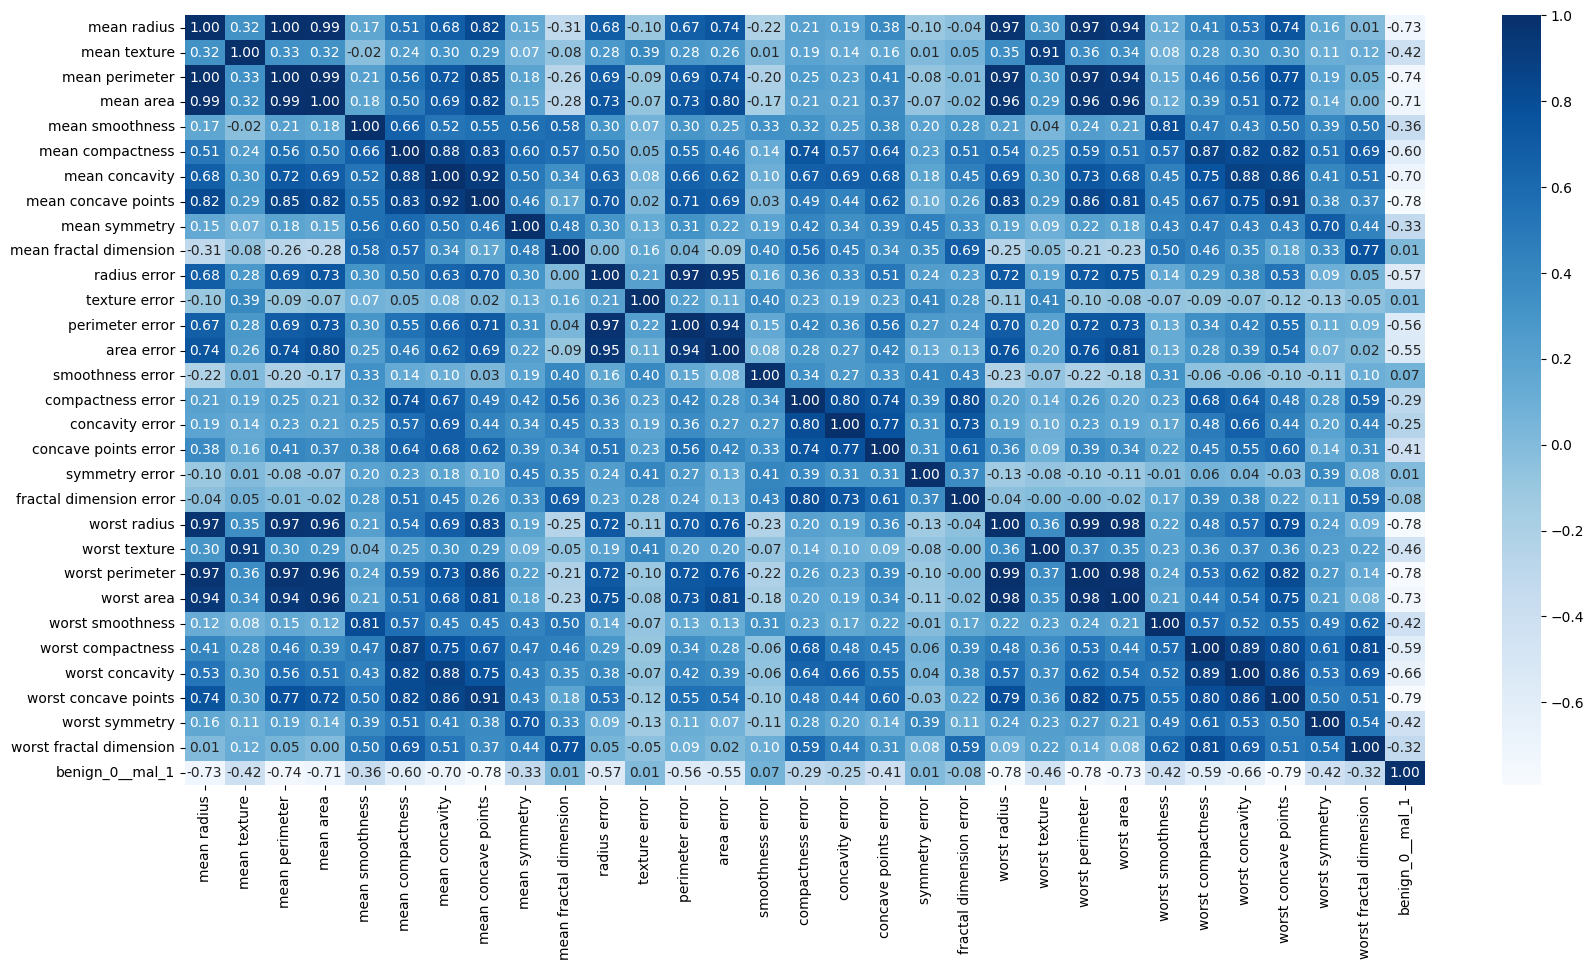

In [ ]:
#Correlation Matrix
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap='Blues')
plt.show()

### Check if the data is **balanced** or not

In [ ]:
class_0, class_1 = df.benign_0__mal_1.value_counts()

In [ ]:
class_0 = df[df['benign_0__mal_1'] == 0]
class_1 = df[df['benign_0__mal_1'] == 1]
print(class_0.shape, class_1.shape)

(212, 31) (357, 31)


In my opinion, this data is fairly balanced with a difference of 145 samples.

### Check if the data is **normalized**

In [ ]:
# Calculate the mean for each feature
mean_values = df.mean()

# Calculate the standard deviation for each feature
std_values = df.std()

# Calculate the skewness for each feature
skewness_values = df.skew()

# Calculate the kurtosis for each feature
kurtosis_values = df.kurtosis()

# Check if mean is close to zero and standard deviation is close to one for each feature
normalized_features = (np.isclose(mean_values, 0, atol=1e-3) & np.isclose(std_values, 1, atol=1e-3))

# Check if skewness is close to zero for each feature
skewness_normalized = np.isclose(skewness_values, 0, atol=1e-3)

# Check if kurtosis is close to three for each feature
kurtosis_normalized = np.isclose(kurtosis_values, 3, atol=1e-3)

# Check if all features meet the normalization criteria
is_normalized = normalized_features.all() and skewness_normalized.all() and kurtosis_normalized.all()

# Print the results
print("Is the dataset normalized?", is_normalized)

Is the dataset normalized? False


Here, the data is not normalized as per our result, so it is necessary to normalize the data in standard level

In [ ]:
x= df.drop("benign_0__mal_1", axis=1)
y = df["benign_0__mal_1"]
x.shape, y.shape


((569, 30), (569,))

In [ ]:
#normalizing using MixMaxScaler u
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x= scaler.fit_transform(x)

In [ ]:
print(scaled_x)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
from scipy.stats import zscore
dfx = pd.DataFrame(scaled_x)

# Calculate the z-scores for each feature
z_scores = dfx.apply(zscore)

# Check if the absolute mean of z-scores is close to zero and standard deviation is close to one
is_normalized = (abs(z_scores.mean()) < 1e-3).all() and (abs(z_scores.std() - 1) < 1e-3).all()

# Print the results
print("Is the dataset normalized?", is_normalized)

Is the dataset normalized? True


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y,
                                   random_state=0,
                                   test_size=0.20,
                                   shuffle=True)
print(len(y_train), len(y_test))

455 114


In [ ]:
accuracy_list=dict()

### Model Selection

Trained models with this dataset:
1. Linear Model - Ridge Classifier
2. Support Vector Classifier
3. Decision Tree
4. Random Forest Classifier


Model Training

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_classify = RidgeClassifier()
ridge_classify.fit(x_train, y_train)
y_preds = ridge_classify.predict(x_test)

-**Precision** for class 0: 1.00 (100% accuracy for class 0 predictions. Precision for class 1: 0.93 (93% accuracy for class 1 predictions)

-**Recall** for class 0: 0.89 (89% of actual class 0 instances correctly identified). Recall for class 1: 1.00 (100% of class 1 instances correctly identified)

-**F1-score** for class 0: 0.94 (balanced accuracy considering precision and recall for class 0). F1-score for class 1: 0.96 (high accuracy in predicting class 1)

-**Support** for class 0: 47 instances. Support for class 1: 67 instances

-**Overall accuracy:** 0.96 (96% overall accuracy on the dataset)

-Macro average precision, recall, and F1-score: around 0.97 (high average performance across classes)

-Weighted average precision, recall, and F1-score: around 0.96 (high average performance considering class distribution)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

#precision :

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**Confusion Matrix Result Analysis:**

*   The model achieved 42 true positive predictions, correctly identifying positive instances.
*   The model achieved 67 true negative predictions, correctly identifying negative instances
*   The model made 5 false positive predictions, incorrectly classifying negative instances as positive.
*   The model did not make any false negative predictions, indicating that it did not miss any positive instances.

In [ ]:
confusion_matrix(y_test,y_preds)

array([[42,  5],
       [ 0, 67]])

In [ ]:
#testing the accuracy percentage

ridge_classify.score(x_test, y_test)

0.956140350877193

Ridge Classifier gives an accuracy score of 0.956 which is almost equal to 96%

In [ ]:
accuracy_list["Ridge Classifier"]= ridge_classify.score(x_test, y_test)

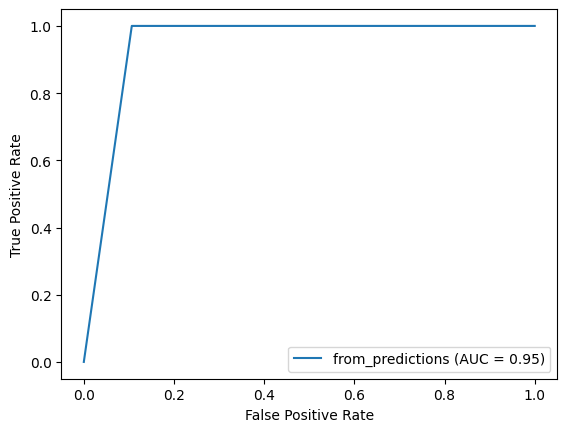

In [ ]:
# plot roc_curve for decision tree model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='from_predictions')
display.plot()
plt.show()

In [ ]:
print(accuracy_list)

{'Ridge Classifier': 0.956140350877193}


Text(50.722222222222214, 0.5, 'Truth')

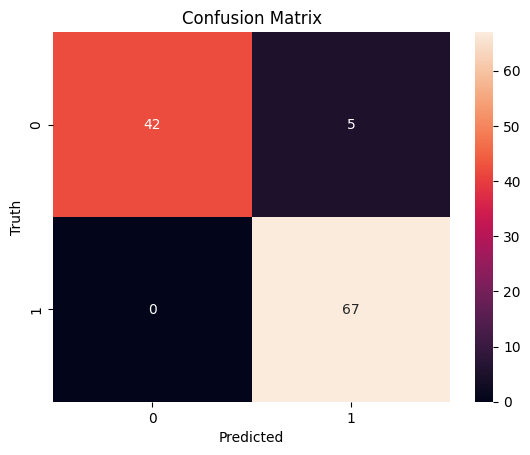

In [ ]:
#confusion matrix:
cm_ridge = confusion_matrix(y_test, y_preds)
sns.heatmap(cm_ridge, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**SVC**

In [ ]:
x_train.head()

NameError: ignored

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel="rbf")
svc.fit(x_train, y_train)
y_svc_preds = svc.predict(x_test)

In [ ]:
print(classification_report(y_test, y_svc_preds))
print(confusion_matrix(y_test, y_svc_preds))
print(svc.score(x_test, y_test)*100)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[45  2]
 [ 1 66]]
97.36842105263158


In [ ]:
accuracy_list["SVC"]= svc.score(x_test, y_test)

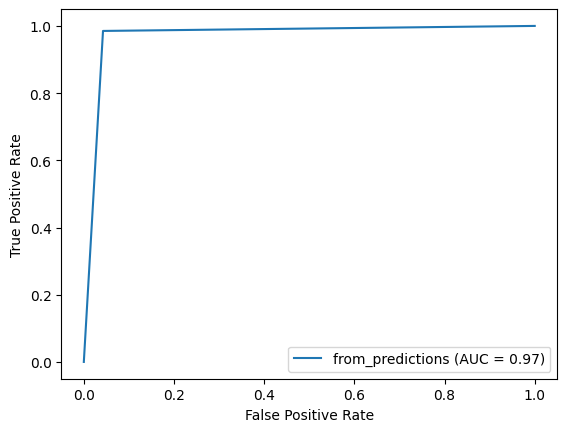

In [ ]:
# plot roc_curve for decision tree model
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_svc_preds)
roc_auc = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='from_predictions')
display.plot()
plt.show()

Text(50.722222222222214, 0.5, 'Truth')

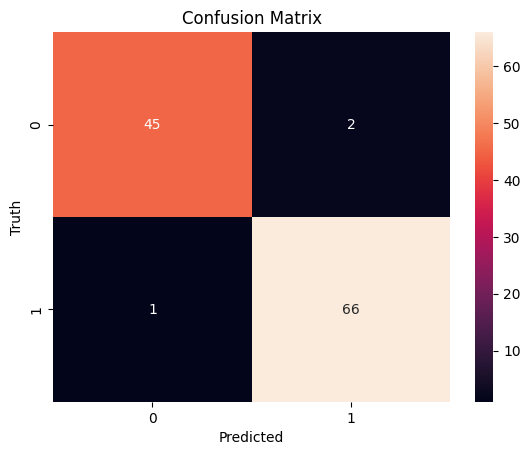

In [ ]:
#confusion matrix:
cm_svc = confusion_matrix(y_test, y_svc_preds)
sns.heatmap(cm_svc, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

DECISION TREE MODEL

In [ ]:
# define decision tree model with max leaf node 500
decision_tree_model = tree.DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
# train model
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=500)

In [ ]:
decision_tree_preds = decision_tree_model.predict(x_test)

In [ ]:
accuracy_score(y_test, decision_tree_preds)

0.9122807017543859

In [ ]:
accuracy_list["Decision Tree"]= accuracy_score(y_test, decision_tree_preds)

In [ ]:
print(classification_report(y_test, decision_tree_preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



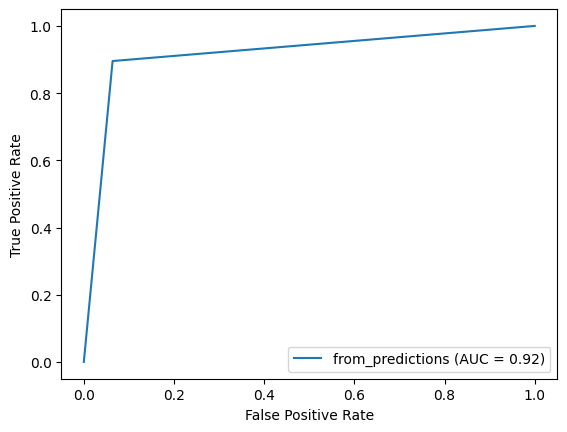

In [ ]:
# plot roc_curve for decision tree model
fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_tree_preds)
roc_auc = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='from_predictions')
display.plot()
plt.show()

Text(50.722222222222214, 0.5, 'Truth')

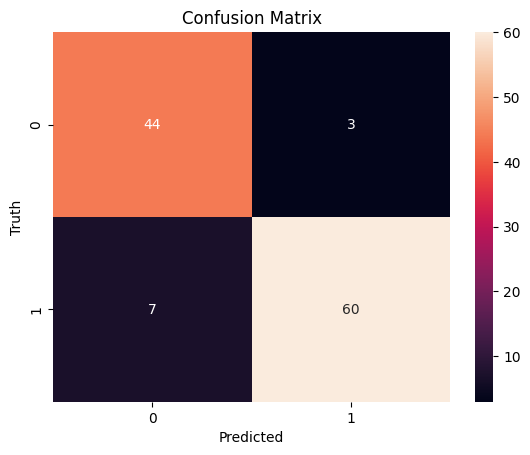

In [ ]:
cm_decision_tree = confusion_matrix(y_test,decision_tree_preds)

# plot confusion matrix for random forest model
sns.heatmap(cm_decision_tree, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_preds_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
accuracy_score(y_test,y_preds_rfc)

0.9736842105263158

In [ ]:
accuracy_list["Random Forest"]= accuracy_score(y_test,y_preds_rfc)

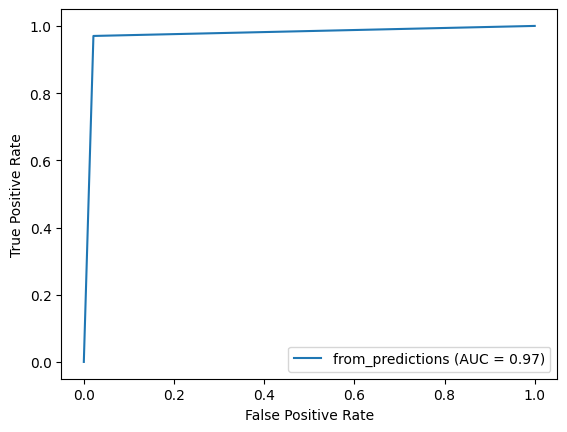

In [ ]:
# plot roc_curve for rfc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds_rfc)
roc_auc = metrics.auc(fpr, tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='from_predictions')
display.plot()
plt.show()

In [ ]:
cm_rfc=confusion_matrix(y_test, y_preds_rfc)

Text(50.722222222222214, 0.5, 'Truth')

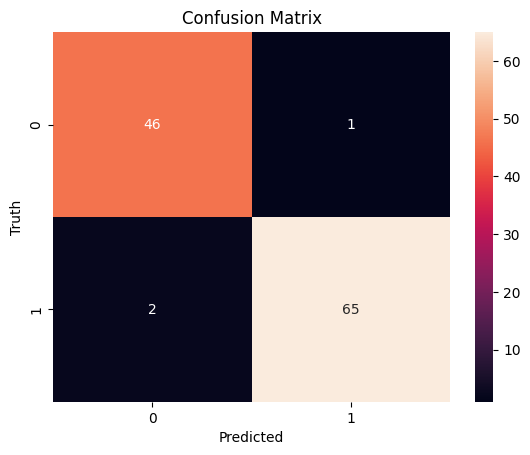

In [ ]:
sns.heatmap(cm_rfc, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
accuracy_list

{'Ridge Classifier': 0.956140350877193,
 'SVC': 0.9736842105263158,
 'Decision Tree': 0.9122807017543859,
 'Random Forest': 0.9736842105263158}

Model Evaluation

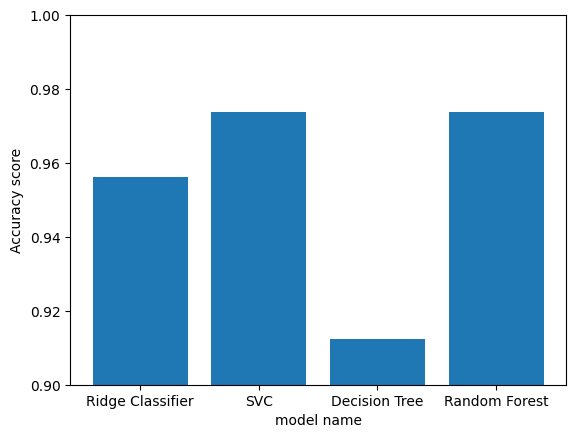

In [ ]:
import matplotlib.pyplot as plt

score=list(accuracy_list.values())
plt.bar(accuracy_list.keys(), accuracy_list.values())
plt.ylim(0.9, 1.00)

plt.xlabel("model name")
plt.ylabel("Accuracy score")
plt.show()

Here, from the plotted  graph, we can see that *SVC has the highest accuracy score* and decision tree has performed the worst for this dataset. So, the selected model should be **SVC **

Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
clf.cv_results_["params"]

[{'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'sigmoid'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'sigmoid'}]

In [ ]:
clf.cv_results_['mean_test_score']
#best test score: rbf then linear

array([0.97142857, 0.98241758, 0.32967033, 0.97362637, 0.97582418,
       0.2967033 ])

In [ ]:
clf.cv_results_['mean_score_time']
#best time: linear then rbf

array([0.00131435, 0.00173254, 0.00344424, 0.00121312, 0.00150633,
       0.00335183])

rbf and linear are good options based on it's test score and score time, but signmoid is worse in all cases. So, using sigmoid is out of question.
Here, we can choose both rbf and linear. I am choosing C1, rbf for the sake of higher test score and because it is pretty fast too

Prediction Testing

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# choose 1 sample data from testing dataset
import random
random.seed(120)
sample_index =  random.choice(range(0, len(x_test)))
random_test_data = x_test[sample_index]

# Print the selected sample
print(random_test_data, sample_index)

[0.23943395 0.62326682 0.22845691 0.12996819 0.31497698 0.12459358
 0.05545923 0.11814115 0.4010101  0.14785173 0.17910556 0.50450849
 0.15747067 0.07127034 0.19730088 0.09987382 0.03699495 0.22409547
 0.17712613 0.10323646 0.20170758 0.56796375 0.18342547 0.09398348
 0.21746021 0.06788524 0.04412141 0.19061856 0.16538537 0.07444576] 65


In [ ]:

def makePrediction(random_test_data):
  predictions = []
  random_test_prediction_decision_tree = decision_tree_model.predict(random_test_data)
  random_test_prediction_random_forest = rfc.predict(random_test_data)
  random_test_prediction_rc = ridge_classify.predict(random_test_data)
  random_test_prediction_svc = svc.predict(random_test_data)
  predictions.extend([random_test_prediction_decision_tree[0], random_test_prediction_random_forest[0],
                      random_test_prediction_rc[0], random_test_prediction_svc[0]])
  print(predictions) # print outputs of different models
  models = ['Decision Tree', 'Random Forest', 'Ridge Classifier', 'SVC']
  votes = 0
  for i in predictions:
    votes += i
  if votes > len(predictions)/2:
    print("This person has breast cancer")
  else:
    print("This person doesn't have breast cancer")
  plt.bar(models, predictions)
  plt.xlabel('Models')
  plt.ylabel('Votes')
  plt.title('Prediction Votes')
  plt.show()

[0, 1, 1, 1]
This person has breast cancer


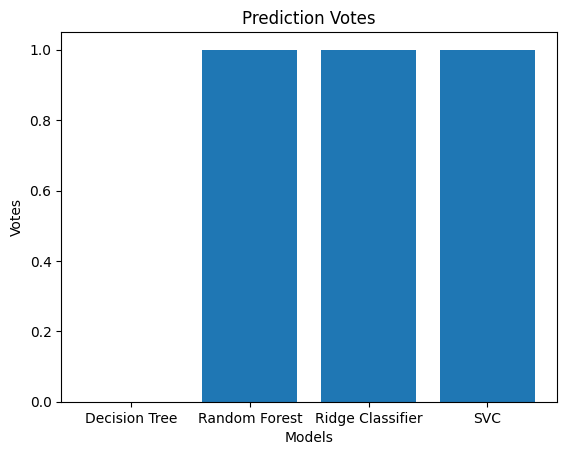

In [ ]:
# make prediction
makePrediction(random_test_data.reshape(1, -1))